<a href="https://colab.research.google.com/github/yun890503/Prediction-of-quality-of-Wine/blob/main/Prediction_of_quality_of_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulpha

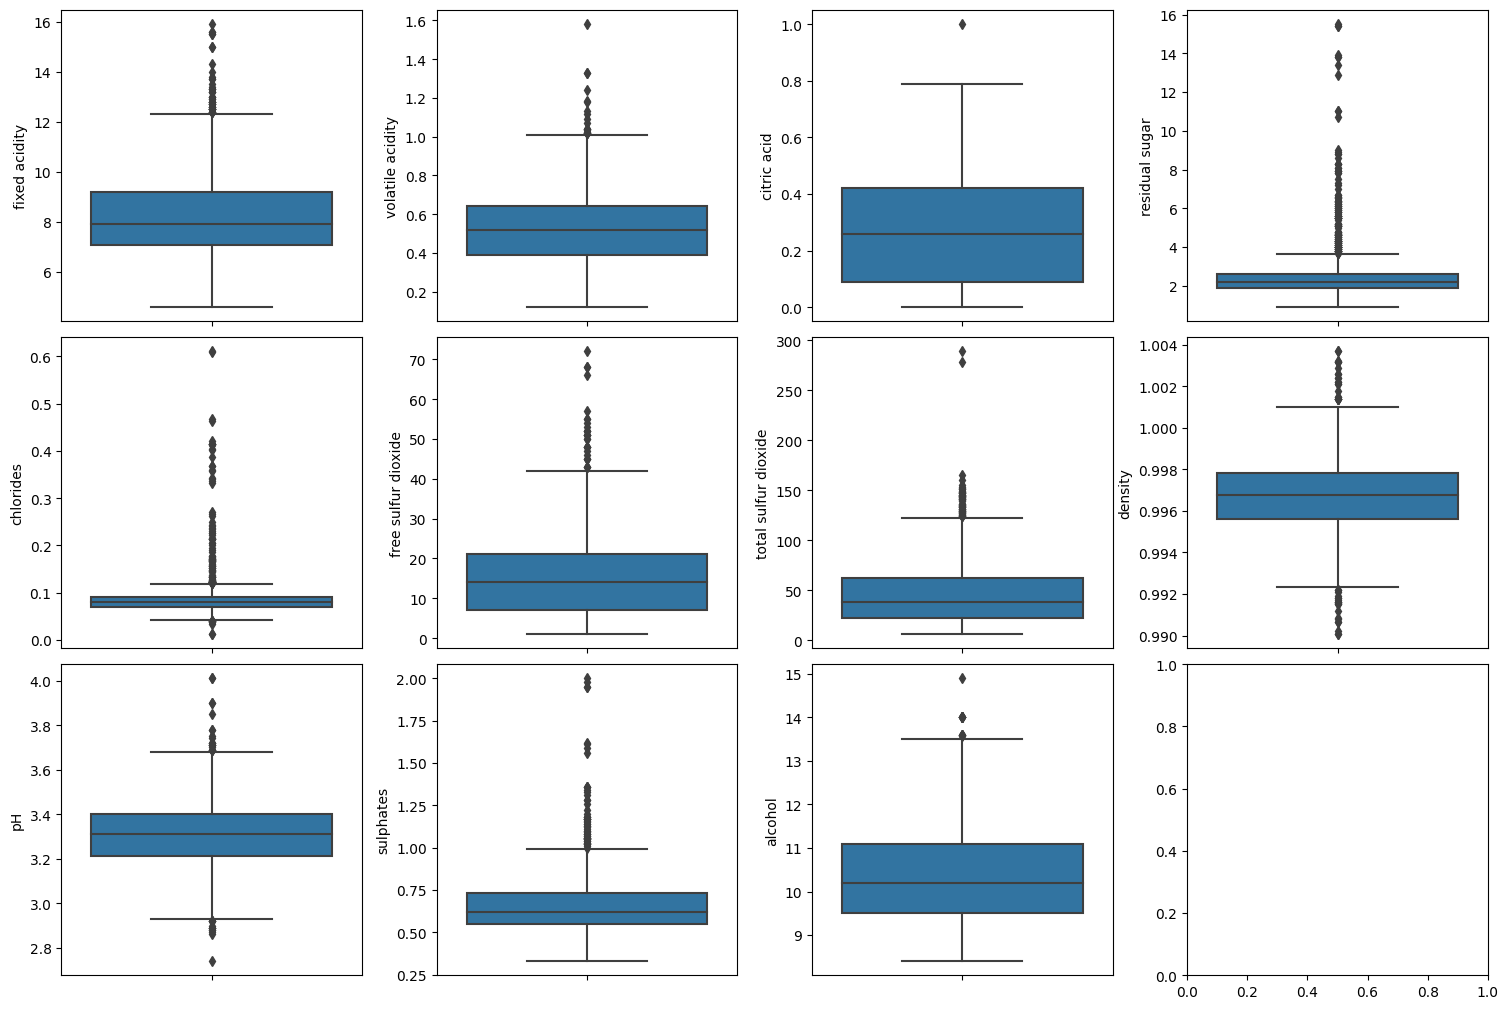

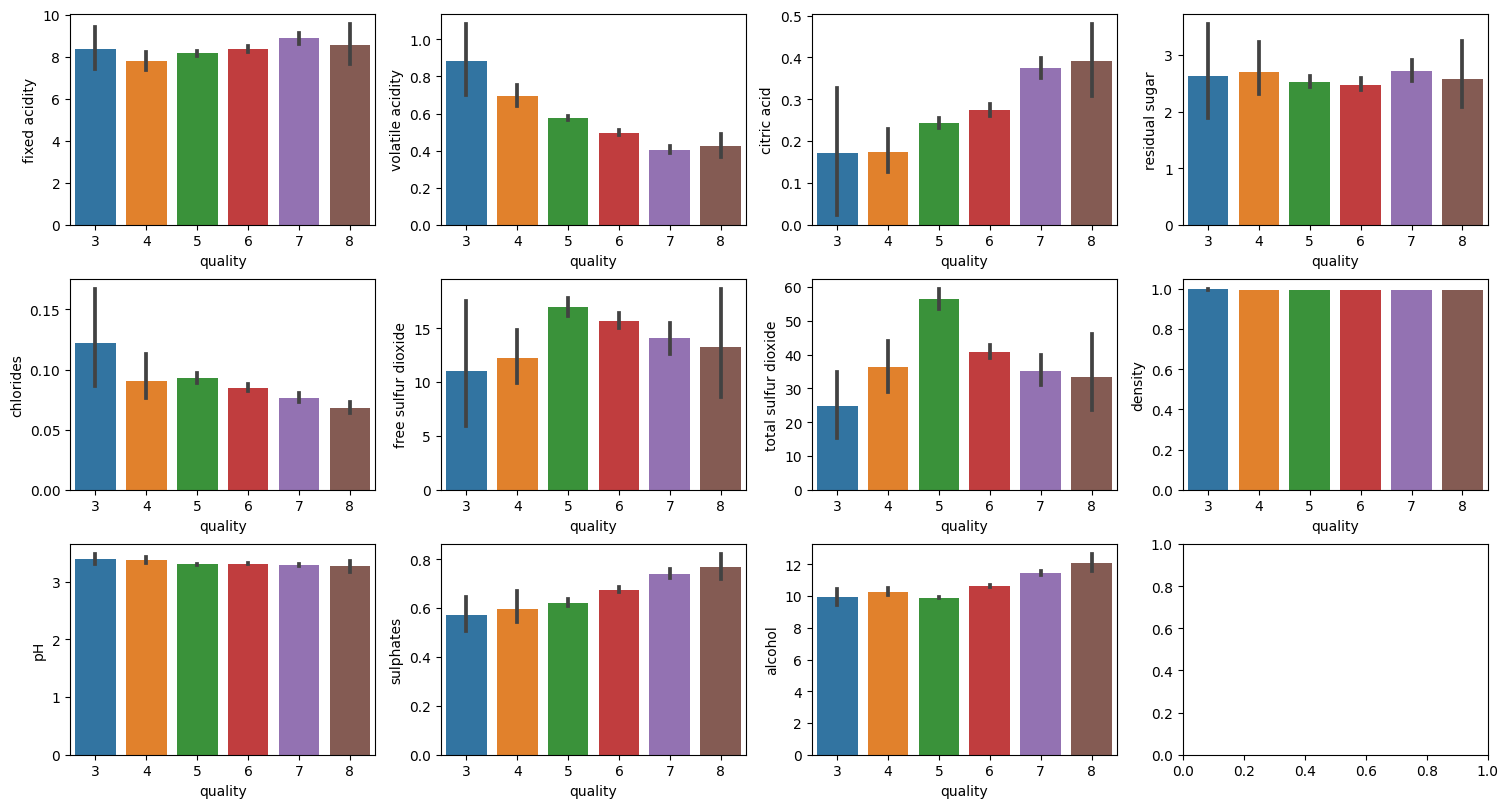

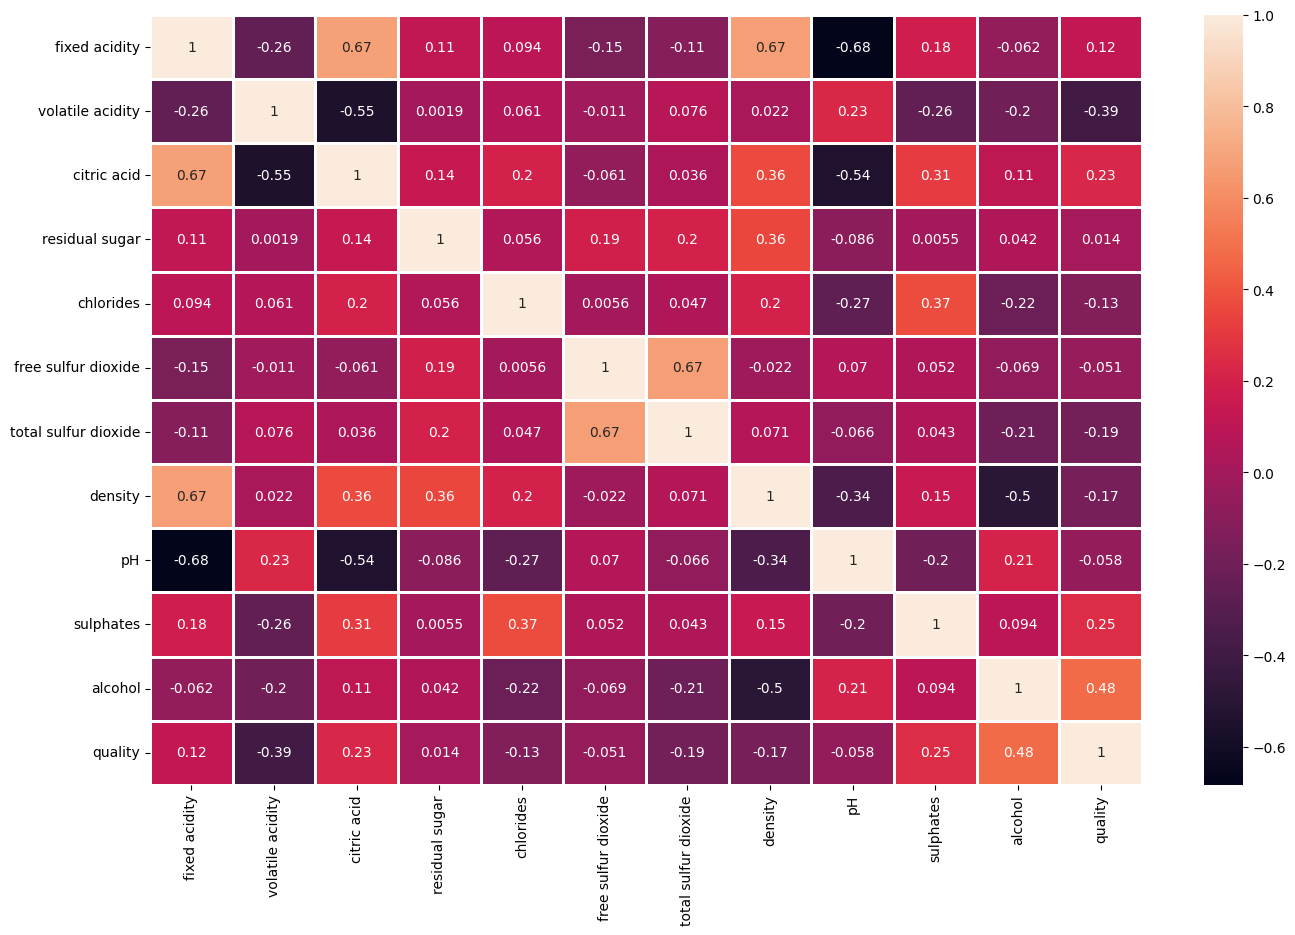

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
# 看前幾筆

# 檢查欄位數量、欄位名稱、資料格式、資料型態
df.head()
# 看後幾筆
df.tail()
# 看全部
df

# 統計觀察
df.describe()
df.info()
# 有哪些列?
for column in df.columns:
  print(column)


# 請找出其他欄位的定義。
# Link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# fixed acidity: 非揮發性酸含量

# volatile acidity: 揮發性酸含量

# citric acid: 檸檬酸

# residual sugar: 糖含量

# chlorides: 氯化物

# free sulfur dioxide: 游離二氧化硫

# total sulfur dioxide: 總二氧化硫

# density: 密度

# pH: 氫離子濃度

# sulphates: 硫酸鹽

# alcohol: 酒精濃度

# quality:品質(0-10)

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))
ax = ax.flatten()
index = 0
for i in df.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

# 觀察其他數值欄位的屬性與[quality]的關係程度

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15, 8))
ax = ax.flatten()
index=0
for i in df.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=df, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

# fixed acidity 對於quality沒有區別性
# density 對於quality沒有區別性
# PH 對於quality沒有區別性
# 質量越高的红酒，酒精揮發程度越低。
# 質量越高的紅酒，檸檬酸含量越高


# 比較每個特徵間的關聯程度
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, linewidth = 1)
plt.show()

# 找出高度正相關的特徵們
